The goal is to find a minimum of a function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution
from numpy import sin, exp 

# Define initial functions. 

In [2]:
# Defining a functions to search minimum of.
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

def h(x: int):
    return f(x).astype(int)

In [3]:
# Defining range.
x = np.arange(0, 30, 0.1)

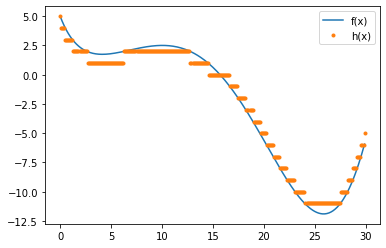

In [4]:
# Displaying our function.
plt.plot(x, f(x), label="f(x)")
plt.plot(x, h(x), '.', label="h(x)")
plt.legend()
plt.show()

# Smooth function gradient optimization

In [5]:
# Finding 1st local minimum.
local_min_1 = minimize(f, 2, method="BFGS")
print(local_min_1)
value_local_min_1 = local_min_1.fun

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])


In [6]:
# Finding 2nd local minimum.
local_min_2 = minimize(f, 30, method="BFGS")
print(local_min_2)
value_local_min_2 = local_min_2.fun

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


In [7]:
# Writing function values in local minimums to file.
with open('output/submission-1.txt', 'w') as file_obj:
    file_obj.write("{} {}".format(round(value_local_min_1, 2), 
                                  round(value_local_min_2, 2)))
    
!cd output/ && cat submission-1.txt    

1.75 -11.9

# Smooth function global optimization 

In [8]:
# Finding global minimum on (1, 30) with differential evolution.
global_min = differential_evolution(f, [(1, 30)])
print(global_min)
value_global_min = global_min.fun

     fun: array([-11.89889467])
     jac: array([5.86197757e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88020279])


In [9]:
# Writing function value in global minimum to file.
with open('output/submission-2.txt', 'w') as file_obj:
    file_obj.write("{}".format(round(value_global_min[0], 2)))  
    
!cd output/ && cat submission-2.txt    

-11.9

# Non-smooth function optimization 

In [10]:
# Trying to find local minimum.
local_min_non_smooth = minimize(h, 30, method="BFGS")
print(local_min_non_smooth)
value_local_min_non_smooth = local_min_non_smooth.fun

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


In [11]:
# Finding global minimum.
global_min_non_smooth = differential_evolution(h, [(1,30)])
print(global_min_non_smooth)
value_global_min_non_smooth = global_min_non_smooth.fun

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([24.85171631])


In [12]:
# Writing function values in minimums to file.
with open('output/submission-3.txt', 'w') as file_obj:
    file_obj.write("{} {}".format(round(value_local_min_non_smooth[0]), 
                                  round(value_global_min_non_smooth, 2)))
    
!cd output/ && cat submission-3.txt    

-5 -11.0